# The Data

In [1]:
import pandas as pd
import numpy as np

Dataset: https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews

In [2]:
rev_df = pd.read_csv("Reviews.csv")

In [3]:
rev_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
rev_df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

# Pre-Processing The Data

In [5]:
rev_df = rev_df.dropna(axis=0) # Remove null values

In [6]:
rev_df.drop_duplicates() # Remove duplicate values

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [7]:
# Drop unncessary columns
rev_df = rev_df.drop('Id', axis=1)
rev_df = rev_df.drop('ProductId', axis=1)
rev_df = rev_df.drop('UserId', axis=1)

# Data Understanding / Visualization

In [8]:
import seaborn as sns

How good are the product reviews in general?

<AxesSubplot:xlabel='Score', ylabel='count'>

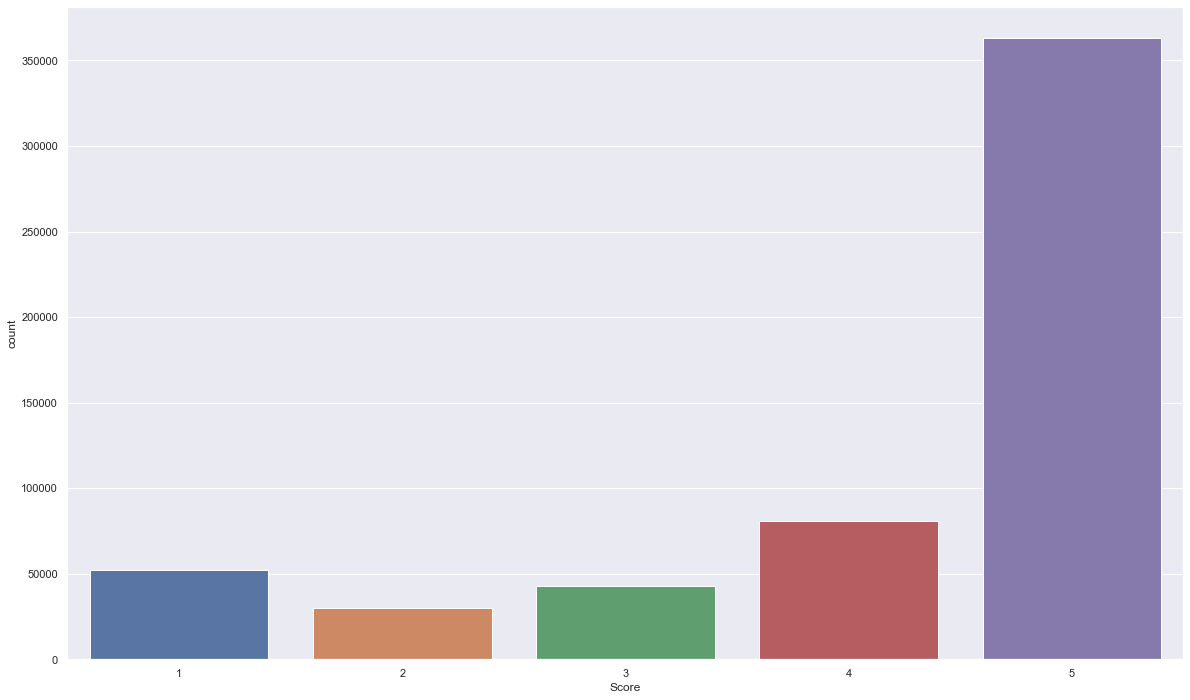

In [9]:
sns.set(rc={"figure.figsize":(20,12)})
sns.countplot(data=rev_df, x='Score')

<AxesSubplot:xlabel='Time', ylabel='Score'>

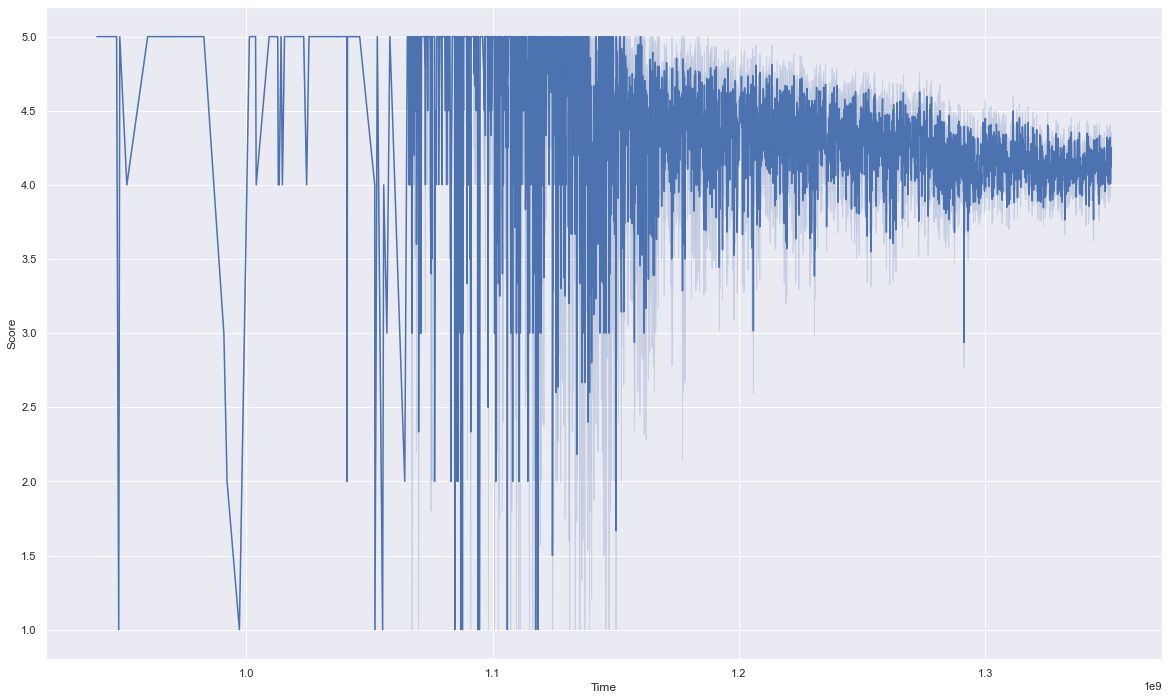

In [10]:
sns.set(rc={"figure.figsize":(20,12)})
sns.lineplot(data=rev_df, x='Time', y='Score')

In [11]:
rev_df.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568411.000000,568411.000000,568411.000000,5.684110e+05
mean,1.743874,2.227876,4.183309,1.296261e+09
std,7.636781,8.288752,1.310368,4.803792e+07
min,0.000000,0.000000,1.000000,9.393408e+08
25%,0.000000,0.000000,4.000000,1.271290e+09
50%,0.000000,1.000000,5.000000,1.311120e+09
75%,2.000000,2.000000,5.000000,1.332720e+09
max,866.000000,923.000000,5.000000,1.351210e+09


# Modeling

In [12]:
rev_df.columns

Index(['ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [13]:
# Make dataset just have Score and Text
rev_df = rev_df[['Score','Text']]

In [14]:
rev_df.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [15]:
!pip install nltk

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HEJoh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HEJoh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
sentiment = SentimentIntensityAnalyzer()

In [18]:
sample = rev_df[0:3]['Text']

In [19]:
for s in sample:
    print(s)
    ss = sentiment.polarity_scores(s)
    print(ss)
    print('---------------------------------------')

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}
---------------------------------------
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}
---------------------------------------
This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are famili

In [20]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [21]:
# Remove stop words
rev_df['Text_Cleaned'] = rev_df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [22]:
sample = rev_df[0:3]['Text_Cleaned']

for s in sample:
    print(s)
    ss = sentiment.polarity_scores(s)
    print(ss)
    print('---------------------------------------')

I bought several Vitality canned dog food products found good quality. The product looks like stew processed meat smells better. My Labrador finicky appreciates product better most.
{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.9413}
---------------------------------------
Product arrived labeled Jumbo Salted Peanuts...the peanuts actually small sized unsalted. Not sure error vendor intended represent product "Jumbo".
{'neg': 0.092, 'neu': 0.801, 'pos': 0.106, 'compound': 0.0762}
---------------------------------------
This confection around centuries. It light, pillowy citrus gelatin nuts - case Filberts. And cut tiny squares liberally coated powdered sugar. And tiny mouthful heaven. Not chewy, flavorful. I highly recommend yummy treat. If familiar story C.S. Lewis' "The Lion, The Witch, The Wardrobe" - treat seduces Edmund selling Brother Sisters Witch.
{'neg': 0.144, 'neu': 0.614, 'pos': 0.241, 'compound': 0.8073}
---------------------------------------


In [23]:
# Get negative sentiment score
rev_df['neg'] = rev_df['Text_Cleaned'].apply(lambda x: sentiment.polarity_scores(x)['neg'])

In [24]:
# Get neutral sentiment score
rev_df['neu'] = rev_df['Text_Cleaned'].apply(lambda x: sentiment.polarity_scores(x)['neu'])

In [25]:
# Get positive sentiment score
rev_df['pos'] = rev_df['Text_Cleaned'].apply(lambda x: sentiment.polarity_scores(x)['pos'])

In [26]:
# Get compound score
rev_df['compound'] = rev_df['Text_Cleaned'].apply(lambda x: sentiment.polarity_scores(x)['compound'])

In [27]:
rev_df.head()

,Score,Text,Text_Cleaned,neg,neu,pos,compound
0,5,I have bought several of the Vitality canned d...,I bought several Vitality canned dog food prod...,0.000,0.543,0.457,0.9413
1,1,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled Jumbo Salted Peanuts.....,0.092,0.801,0.106,0.0762
2,4,This is a confection that has been around a fe...,"This confection around centuries. It light, pi...",0.144,0.614,0.241,0.8073
3,2,If you are looking for the secret ingredient i...,If looking secret ingredient Robitussin I beli...,0.000,1.000,0.000,0.0000
4,5,Great taffy at a great price. There was a wid...,Great taffy great price. There wide assortment...,0.000,0.417,0.583,0.9468


# K-Means Clustering

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [29]:
X = rev_df[['neg','neu','pos','compound']]

Text(0, 0.5, 'Variance')

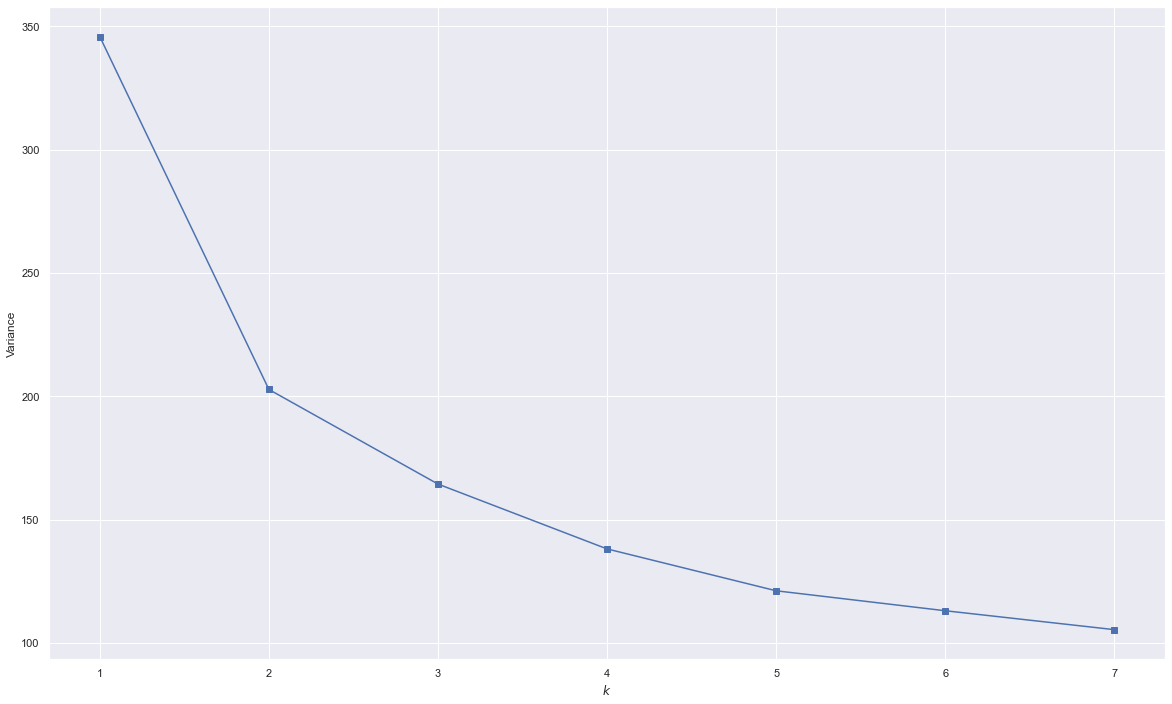

In [30]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

In [31]:
kmeans = KMeans(n_clusters = 2, random_state = 1).fit(X)

In [32]:
y = kmeans.fit_predict(X)

In [33]:
rev_df['Cluster'] = y

In [35]:
rev_df.head()

,Score,Text,Text_Cleaned,neg,neu,pos,compound,Cluster
0,5,I have bought several of the Vitality canned d...,I bought several Vitality canned dog food prod...,0.000,0.543,0.457,0.9413,1
1,1,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled Jumbo Salted Peanuts.....,0.092,0.801,0.106,0.0762,0
2,4,This is a confection that has been around a fe...,"This confection around centuries. It light, pi...",0.144,0.614,0.241,0.8073,1
3,2,If you are looking for the secret ingredient i...,If looking secret ingredient Robitussin I beli...,0.000,1.000,0.000,0.0000,0
4,5,Great taffy at a great price. There was a wid...,Great taffy great price. There wide assortment...,0.000,0.417,0.583,0.9468,1


# Cluster Visualization

<AxesSubplot:xlabel='neg', ylabel='pos'>

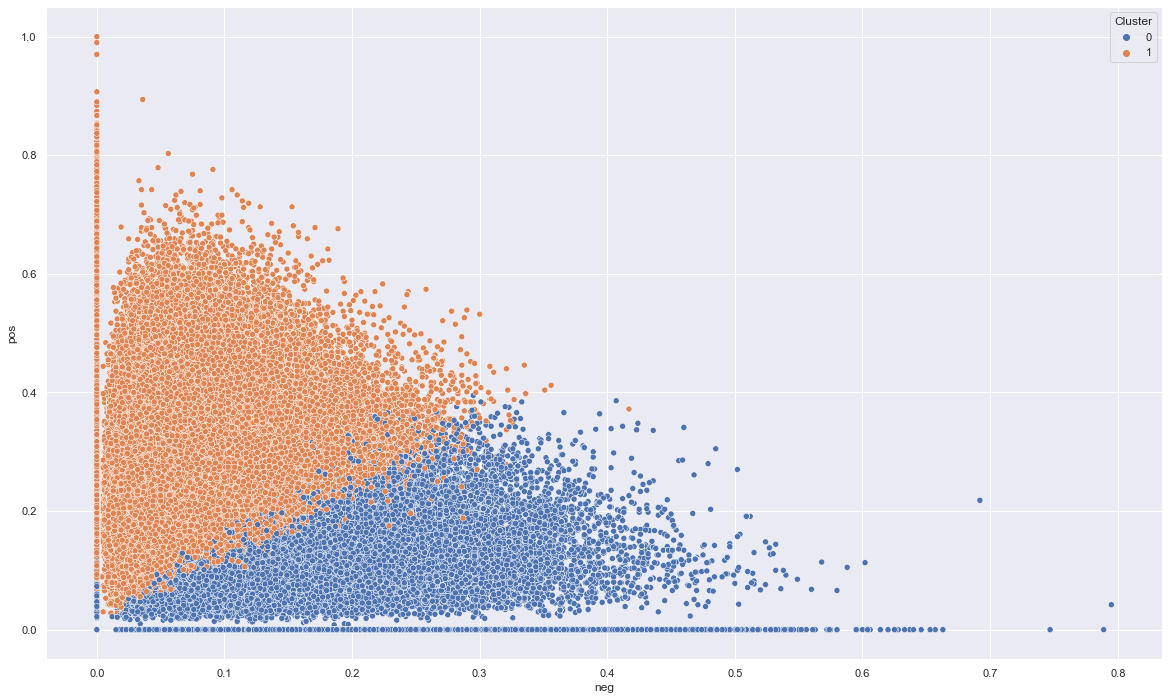

In [36]:
sns.scatterplot(x = rev_df['neg'], y = rev_df['pos'], hue=rev_df['Cluster'])